In [19]:
from evotorch import Problem
from evotorch.algorithms import SNES
from evotorch.logging import StdOutLogger, PandasLogger
import torch
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [4]:
# Create a Problem instance to solve
def sphere(x: torch.Tensor) -> torch.Tensor:
    return torch.sum(x.pow(2.0))

problem = Problem("min", sphere, solution_length=10, initial_bounds=(-1, 1))

# Create a SearchAlgorithm instance to optimise the Problem instance
searcher = SNES(problem, stdev_init=5)

# Create loggers as desired
# stdout_logger = StdOutLogger(searcher)  # Status printed to the stdout
pandas_logger = PandasLogger(searcher)  # Status stored in a Pandas dataframe

[2023-07-10 16:08:45] INFO     <67615> evotorch.core: Instance of `Problem` (id:4848546640) -- The `dtype` for the problem's decision variables is set as torch.float32
[2023-07-10 16:08:45] INFO     <67615> evotorch.core: Instance of `Problem` (id:4848546640) -- `eval_dtype` (the dtype of the fitnesses and evaluation data) is set as torch.float32
[2023-07-10 16:08:45] INFO     <67615> evotorch.core: Instance of `Problem` (id:4848546640) -- The `device` of the problem is set as cpu
[2023-07-10 16:08:45] INFO     <67615> evotorch.core: Instance of `Problem` (id:4848546640) -- The number of actors that will be allocated for parallelized evaluation is 0


In [5]:
# Evolve!
searcher.run(100)

<Axes: xlabel='iter'>

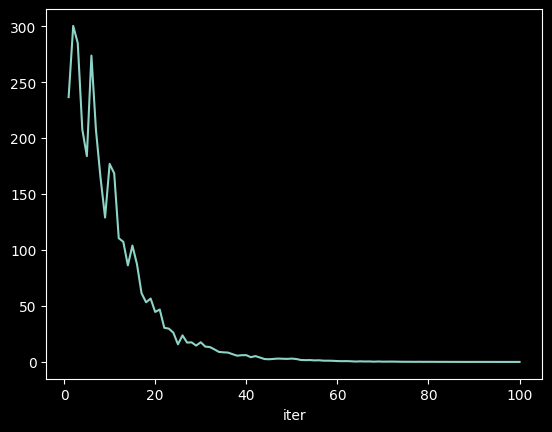

In [20]:
# Process the information accumulated by the loggers.
progress = pandas_logger.to_dataframe()
progress.mean_eval.plot()  # Display a graph of the evolutionary progress by using the pandas data frame

In [7]:
best_discovered_solution = searcher.status["best"]
best_discovered_solution

<Solution values=tensor([-0.0253,  0.0227,  0.0052,  0.0258,  0.0009,  0.0181,  0.0242,  0.0284,
        -0.0040,  0.0049]), evals=tensor([0.0036])>

In [14]:
print(best_discovered_solution)

<Solution values=tensor([-0.0253,  0.0227,  0.0052,  0.0258,  0.0009,  0.0181,  0.0242,  0.0284,
        -0.0040,  0.0049]), evals=tensor([0.0036])>


In [11]:
print(searcher.status["center"])

ReadOnlyTensor([-0.0236,  0.0155, -0.0038, -0.0128,  0.0143,  0.0037, -0.0357,
                 0.0526,  0.0085,  0.0116])
